In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scipy as sp

In [5]:
# %precision 3    # 소수점 3자리까지 표현

In [6]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [7]:
fish_data = [2,3,4,5,3,2,2,3,6,8,6]

In [8]:
sp.mean(fish_data)

4.0

In [9]:
sp.var(fish_data)

3.6363636363636362

In [ ]:
# 분산, 표준편차 : 데이터가 얼마나 평균에서 흩어져 있는지 변동성의 크기를 의미

# 분산 : sum((x - x.mean)**) / n
# 표준편차 : sp.sqrt(sum((x - x.mean)**2) / n)

In [10]:
# 불편분산
# ddof : 자유도 (전체 데이터 수 - 변수의 수)
# 표본의 통계량을 계산 시 사용
# 자유로이 값을 가질 수 있는 값의 개수
# 표본의 분산이 모분산 보다 작게 값이 계산되는 것을 보정하는 값

sp.var(fish_data, ddof=1) 

4.0

In [11]:
sp.std(fish_data)

1.9069251784911847

In [12]:
sp.std(fish_data, ddof=1) # 불편표준편차

2.0

In [13]:
# 정규화(z) : 평균을 0으로 표준편차를 1인 정규분포로 만드는 것
# 정규화된 z값 : 평균 0을 중심으로 몇 표준편차 떨어져있는가를 나타내는 값

In [15]:
(fish_data - sp.mean(fish_data)) / sp.std(fish_data) # 표준정규분포

array([-1.04880885, -0.52440442,  0.        ,  0.52440442, -0.52440442,
       -1.04880885, -1.04880885, -0.52440442,  1.04880885,  2.0976177 ,
        1.04880885])

In [16]:
sp.mean((fish_data - sp.mean(fish_data)) / sp.std(fish_data))

-1.0092936587501423e-16

In [18]:
sp.std((fish_data - sp.mean(fish_data)) / sp.std(fish_data))

0.9999999999999998

In [19]:
# 기본 통계함수

In [20]:
sp.mean(fish_data)

4.0

In [21]:
sp.var(fish_data)

3.6363636363636362

In [22]:
sp.std(fish_data)

1.9069251784911847

In [23]:
sp.amax(fish_data)

8

In [24]:
sp.amin(fish_data)

2

In [25]:
sp.median(fish_data)

3.0

In [26]:
# 공분산
# 두 데이터가 함께 움직이는 수준, 두 데이터의 관계성, 방향성

In [27]:
cov_data = pd.read_csv('stat_files/cov.csv')
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


In [34]:
x = cov_data.x
y = cov_data.y

In [220]:
np.sum((cov_data.x - sp.mean(cov_data.x))*(cov_data.y - sp.mean(cov_data.y))) / len(cov_data.x)

6.9060000000000015

In [37]:
sp.cov(x, y, ddof = 0)

array([[ 3.2816,  6.906 ],
       [ 6.906 , 25.21  ]])

In [ ]:
# 상관계수 : 공분산 / (x표준편차 * y표준편차)

In [40]:
np.sum((cov_data.x - sp.mean(cov_data.x))*(cov_data.y - sp.mean(cov_data.y)) / len(cov_data.x)) / (sp.std(x) * sp.std(y))

0.7592719041137087

In [44]:
# 불편상관계수 - 자유도 반영

np.sum((cov_data.x - sp.mean(cov_data.x))*(cov_data.y - sp.mean(cov_data.y)) / (len(cov_data.x)-1)) / (sp.std(x) * sp.std(y))

0.8436354490152319

In [45]:
sp.cov(x, y, ddof=0)

array([[ 3.2816,  6.906 ],
       [ 6.906 , 25.21  ]])

In [46]:
sp.cov(x, y, ddof=1)

array([[ 3.64622222,  7.67333333],
       [ 7.67333333, 28.01111111]])

In [49]:
sp.cov(x, y, ddof = 0) / (sp.std(x) * sp.std(y))

array([[0.36079158, 0.7592719 ],
       [0.7592719 , 2.77168328]])

In [51]:
sp.cov(x, y, ddof = 0) / sp.sqrt((sp.var(x) * sp.var(y)))

array([[0.36079158, 0.7592719 ],
       [0.7592719 , 2.77168328]])

In [52]:
# 표본추출

In [54]:
fish_5 = np.array([2,3,4,5,6,7])

In [55]:
np.random.choice(fish_5, size = 1, replace = False)   # 비복원추출

array([3])

In [59]:
np.random.choice(fish_5, size = 3, replace = True)   # 복원추출

array([2, 4, 4])

In [63]:
fish_100000 = pd.read_csv('stat_files/fish_length_100000.csv')
fish_100000

,length
0,5.297442
1,3.505566
2,3.572546
3,3.135979
4,4.689275
...,...
99995,4.158780
99996,4.818718
99997,4.060880
99998,4.271488


In [65]:
len(fish_100000)    # 모집단

100000

In [67]:
fish_sample = np.random.choice(fish_100000.length, size = 10, replace = False)    # 샘플(표본), 샘플의 크기 n=10
fish_sample

array([3.77492939, 3.66291744, 4.42617244, 4.31243738, 4.62747934,
       3.23908043, 5.00676859, 4.94326723, 4.70157704, 3.25107906])

In [68]:
sp.mean(fish_sample)    # 샘플의 평균

4.194570835312723

In [69]:
sp.var(fish_sample)     # 샘플의 분산

0.3994101293368339

In [70]:
sp.std(fish_sample)    # 샘플의 표준편차

0.6319890262788065

In [79]:
# 모수

mu = sp.mean(fish_100000)
theta = sp.var(fish_100000)

print(mu, theta)

length    4.0
dtype: float64 length    0.64
dtype: float64


In [73]:
# 중심극한정리

# 모집단의 형태에 상관없이 사이즈가 큰 표본의 평균의 분포는 평균이 모평균, 분산이 모분산을 np.sqrt(n)으로 나눈 정규분표를 따른다

In [113]:
sample_means = []

for _ in range(100):
    sample = np.random.choice(fish_100000.length, size = 10, replace = False)
    sample_mean = sp.mean(sample)
    sample_means.append(sample_mean)

In [114]:
sample_means   # 샘플 평균들의 분포

[4.054251011009142,
 4.122714008243394,
 3.931005944782291,
 4.04997419526102,
 3.917154347213097,
 3.964299170033417,
 3.714102100041375,
 4.30147439805841,
 4.253245786238655,
 3.9872019423878102,
 4.241188330168042,
 3.682029363148787,
 4.201548934260271,
 4.095485873263594,
 4.117471137238603,
 4.1645839461840035,
 4.137423305861445,
 3.9670128058970016,
 4.197216870753239,
 4.0034815654795155,
 4.097762893604496,
 4.134762468870424,
 4.312877255064074,
 4.663052183899259,
 3.8032593943561324,
 4.315944425236454,
 3.8800702961709206,
 4.169442466646837,
 3.459006613012665,
 4.354698991480908,
 3.9838155956200105,
 3.980692692129712,
 3.6677193177951253,
 3.8874482099821193,
 3.528817373337946,
 4.4332537373365195,
 3.692589225712626,
 3.983730847074205,
 4.255005431162267,
 3.917081511290507,
 4.085329652114827,
 3.9334233850253817,
 3.856567111241449,
 4.260197071109948,
 3.9464125212947936,
 4.41152892649542,
 4.138461940641887,
 4.182288397890746,
 4.182854086124328,
 3.83255914

In [115]:
sp.mean(sample_means)   # 샘플 평균들의 분포의 평균   => 모평균에 수렴

4.038512148941374

In [116]:
sp.var(sample_means)   # 샘플 평균들의 분포의 분산    => 모분산에 수렴

0.06031835526565378

In [117]:
# 모분산

sp.var(sample_means) * 100

6.031835526565378

In [111]:
# 모분산 / n

0.64 / 30

0.021333333333333333

<AxesSubplot:ylabel='Density'>

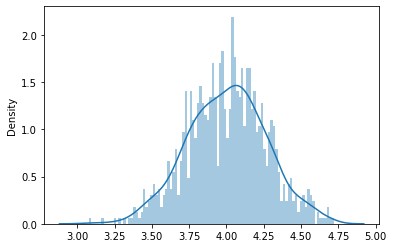

In [112]:
sns.distplot(sample_means, bins = 100)  # 샘플 평균들의 분포 > 정규분포(mu, theta / n) > N(4, )

In [118]:
from scipy import stats

In [122]:
x = np.arange(start = 1, stop = 7, step = 0.1)
x

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9])

In [123]:
stats.norm.pdf(x = x, loc = 4, scale = 0.8)      # 평균 4, 표준편차 0.8인 정규분포에서 x값에 대한 확률값

array([4.40744603e-04, 6.98826903e-04, 1.09085337e-03, 1.67639859e-03,
       2.53631007e-03, 3.77782254e-03, 5.53981051e-03, 7.99765039e-03,
       1.13669531e-02, 1.59052270e-02, 2.19103756e-02, 2.97148760e-02,
       3.96745648e-02, 5.21512316e-02, 6.74887081e-02, 8.59828448e-02,
       1.07846649e-01, 1.33172835e-01, 1.61896995e-01, 1.93765332e-01,
       2.28311357e-01, 2.64845807e-01, 3.02463406e-01, 3.40068748e-01,
       3.76421790e-01, 4.10201211e-01, 4.40081658e-01, 4.64818867e-01,
       4.83335146e-01, 4.94797109e-01, 4.98677851e-01, 4.94797109e-01,
       4.83335146e-01, 4.64818867e-01, 4.40081658e-01, 4.10201211e-01,
       3.76421790e-01, 3.40068748e-01, 3.02463406e-01, 2.64845807e-01,
       2.28311357e-01, 1.93765332e-01, 1.61896995e-01, 1.33172835e-01,
       1.07846649e-01, 8.59828448e-02, 6.74887081e-02, 5.21512316e-02,
       3.96745648e-02, 2.97148760e-02, 2.19103756e-02, 1.59052270e-02,
       1.13669531e-02, 7.99765039e-03, 5.53981051e-03, 3.77782254e-03,
      

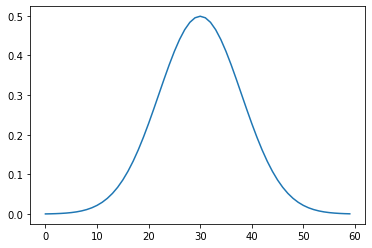

In [125]:
plt.plot(stats.norm.pdf(x = x, loc = 4, scale = 0.8))

In [126]:
stats.norm.pdf(2, loc = 4, scale = 0.8)

0.021910375616960673

In [127]:
stats.norm.pdf(3, loc = 4, scale = 0.8)

0.2283113567362774

In [130]:
sample_norm = stats.norm.rvs(loc = 4, scale = 0.8, size = 10)   # rvs - 특정 분포에서 샘플을 추출하는 함수
sample_norm

array([3.09501685, 4.60855689, 4.18171301, 4.31665997, 2.71252515,
       5.25522352, 4.95865133, 3.73127701, 4.26909329, 3.60523969])

In [131]:
np.mean(sample_norm)

4.073395670729523

In [132]:
sp.var(sample_norm)

0.5721408808641618

In [133]:
population = stats.norm(loc = 4, scale = 0.8)   # 평균이 4이고 표준편차가 0.8인 정규분포 객체 생성

In [134]:
population.rvs(size = 10)   # 샘플 10개 추출

array([3.65866836, 2.70038299, 3.67539761, 4.82475927, 2.70580766,
       4.40220805, 4.36409998, 3.16432036, 3.51645874, 3.7517072 ])

In [135]:
population.pdf(5)   # 5가 등장할 확률

0.2283113567362774

In [136]:
# 중심극한정리

In [137]:
sample_means = []

for _ in range(100):
    sample = population.rvs(size = 30)   # 이론적으로 30개 이상 추출해야 중심극한정리 성립
    sample_means.append(sp.mean(sample))

In [140]:
sp.mean(sample_means)

3.9939059584382006

In [142]:
sp.var(sample_means) * 30    # 표본평균분포의 분산 = theta / a

0.5915881655978152

<AxesSubplot:ylabel='Density'>

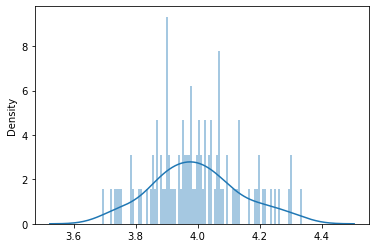

In [145]:
sns.distplot(sample_means, bins = 100)

In [146]:
def calc_sample_mean(size = 30, n_trial = 10000):

    sample_means = []

    for _ in range(n_trial):
        sample = population.rvs(size)   # 이론적으로 30개 이상 추출해야 중심극한정리 성립
        sample_means.append(sp.mean(sample))
        
    return sample_means

In [157]:
sam_arr1= calc_sample_mean(size =30, n_trial=1000)
sam_arr2= calc_sample_mean(size =100, n_trial=1000)
sam_arr3= calc_sample_mean(size =500, n_trial=1000)
sam_arr4= calc_sample_mean(size =1000, n_trial=1000)

In [158]:
print(sp.mean(sam_arr1), sp.mean(sam_arr2), sp.mean(sam_arr3), sp.mean(sam_arr4))

4.002894129478407 3.99972862183674 4.000229950995927 4.000457482839453


In [159]:
print(sp.std(sam_arr1), sp.std(sam_arr2), sp.std(sam_arr3), sp.std(sam_arr4))    # theta / n

0.1475360218801626 0.08007137609187706 0.03482209912020058 0.025162711065839644


<AxesSubplot:ylabel='Density'>

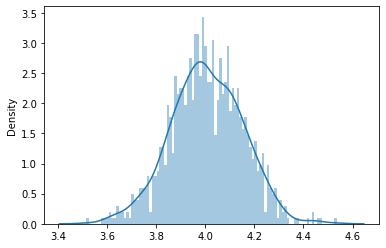

In [154]:
sns.distplot(sam_arr1, bins=100)

<AxesSubplot:ylabel='Density'>

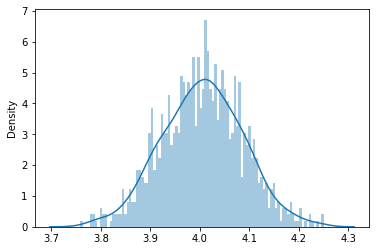

In [156]:
sns.distplot(sam_arr2, bins=100)

<AxesSubplot:ylabel='Density'>

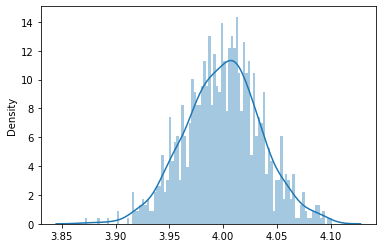

In [155]:
sns.distplot(sam_arr3, bins=100)

<AxesSubplot:ylabel='Density'>

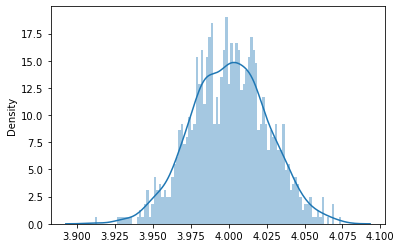

In [160]:
sns.distplot(sam_arr4, bins=100)

In [161]:
# 샘플의 사이즈가 클수록 샘플평균의 분포는 평균은 모평균에 더욱 수렴하고 분산은 줄어든다.

In [164]:
# 확률밀도함수

# PDF(Probability Density Function, 확률 밀도 함수) : 확률분포
# CDF(Cumulative Distribution Function, 누적 분포 함수) : 누적확률분포

In [165]:
x = np.arange(start = 1, stop = 7, step = 0.1)

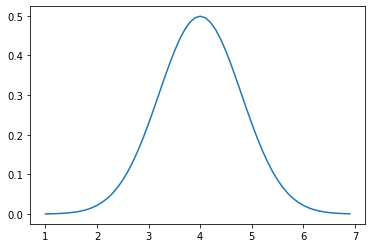

In [167]:
plt.plot(x, stats.norm.pdf(x=x, loc = 4, scale= 0.8))    # 특정 값의 확률

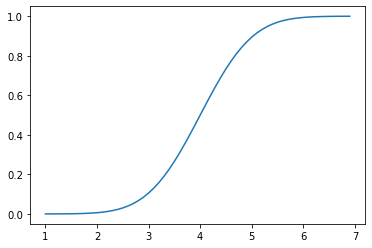

In [169]:
plt.plot(x, stats.norm.cdf(x=x, loc = 4, scale= 0.8))    # 0부터 특정 값까지 누적 확률

In [163]:
norm_dist = stats.norm(loc=4, scale=0.8)

In [170]:
norm_dist.pdf(x=3)

0.2283113567362774

In [171]:
norm_dist.cdf(x=3)   # x 값을 입력받은 후 x까지의 누적밀도확률값

0.10564977366685535

In [172]:
norm_dist.pdf(x=4)

0.49867785050179086

In [173]:
norm_dist.cdf(x=4)

0.5

In [176]:
norm_dist.pdf(x=5)

0.2283113567362774

In [177]:
norm_dist.cdf(x=5)

0.8943502263331446

In [178]:
# 퍼센트포인트 : 누적확률값을 입력받은 후 x값을 리턴

In [179]:
norm_dist.ppf(q = 0.025)

2.4320288123679563

In [180]:
norm_dist.ppf(q = 0.5)

4.0

In [183]:
norm_dist.ppf(q = 0.8)

4.673296986858332

In [184]:
norm_dist # 평균 5, 표준편차 0.8 정규분포

In [192]:
# 5.5가 나올 확률

norm_dist.pdf(5.5)

0.08598284478336488

In [193]:
# 3 이하가 나올 확률을 구하시오

norm_dist.cdf(3)

0.10564977366685535

In [194]:
# 5 이상 나올 확률

1 - norm_dist.cdf(5)

0.10564977366685535

In [196]:
# 2 ~ 3이 나올 확률

norm_dist.cdf(3) - norm_dist.cdf(2)

0.09944010834107922

In [197]:
# 2 ~ 3이외의 값이 나올 확률

1 - (norm_dist.cdf(3) - norm_dist.cdf(2))

0.9005598916589208

In [201]:
# 누적확률이 70%가 되는 x값은

norm_dist.ppf(0.7)

4.419520410166433

In [202]:
# 3보다 작고 5보다 클 확률

(1 - norm_dist.cdf(5)) * 2

0.2112995473337107

In [203]:
# 정규분포 = > 표준정규분포 N(0, 1) : z분포
# 표준화 : z = (x - x_mean) / x.std()

In [206]:
z_arr = (x - x.mean()) / x.std()

In [207]:
sp.mean(z_arr)

-1.2212453270876723e-16

In [208]:
sp.std(z_arr)

1.0

In [209]:
# 표준정규분포 객체

z_dist = stats.norm(loc = 0, scale = 1)

In [212]:
norm_temp = norm_dist.rvs(size=100)
print(sp.mean(norm_temp), sp.std(norm_temp))

3.8808595631259055 0.7490660649897325


In [214]:
z_temp = (norm_temp - norm_temp.mean()) / sp.std(norm_temp)

In [215]:
def to_standardization(x):
    return (x - 4) / 0.8

In [218]:
z3 = to_standardization(3)
z3

-1.25

In [217]:
z_dist.cdf(z3)

0.10564977366685535